SVM: Utilize diferentes Kernels, valores de gamma e C, justifique
a escolha dos melhores valores. Faça a divisão do dataset em treinamento e teste

Resultados da classificação para diferentes combinações de parâmetros:

Kernel: linear, Gamma: auto, C: 1 -> Acurácia: 98.15%
Kernel: linear, Gamma: auto, C: 5 -> Acurácia: 100.00%
Kernel: linear, Gamma: auto, C: 10 -> Acurácia: 100.00%
Kernel: linear, Gamma: 0.1, C: 1 -> Acurácia: 98.15%
Kernel: linear, Gamma: 0.1, C: 5 -> Acurácia: 100.00%
Kernel: linear, Gamma: 0.1, C: 10 -> Acurácia: 100.00%
Kernel: linear, Gamma: 1, C: 1 -> Acurácia: 98.15%
Kernel: linear, Gamma: 1, C: 5 -> Acurácia: 100.00%
Kernel: linear, Gamma: 1, C: 10 -> Acurácia: 100.00%
Kernel: linear, Gamma: 10, C: 1 -> Acurácia: 98.15%
Kernel: linear, Gamma: 10, C: 5 -> Acurácia: 100.00%
Kernel: linear, Gamma: 10, C: 10 -> Acurácia: 100.00%
Kernel: poly, Gamma: auto, C: 1 -> Acurácia: 100.00%
Kernel: poly, Gamma: auto, C: 5 -> Acurácia: 100.00%
Kernel: poly, Gamma: auto, C: 10 -> Acurácia: 100.00%
Kernel: poly, Gamma: 0.1, C: 1 -> Acurácia: 100.00%
Kernel: poly, Gamma: 0.1, C: 5 -> Acurácia: 100.00%
Kernel: poly, Gamma: 0

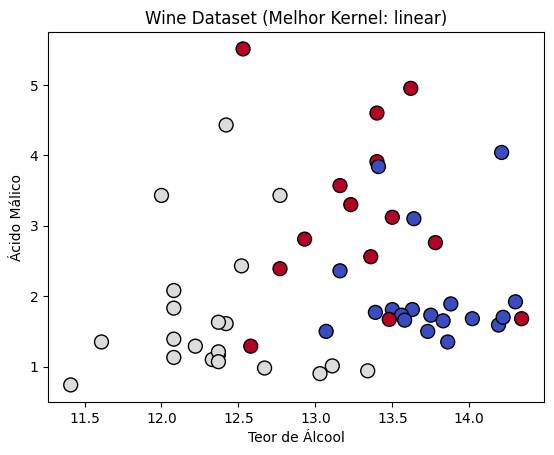

In [12]:
from sklearn.datasets import load_wine
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

X, y = load_wine(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
gammas = ['auto', 0.1, 1, 10]
Cs = [1, 5, 10]

melhor_score = 0
melhor_kernel = ''
melhor_gamma = ''
melhor_C = 0

print("Resultados da classificação para diferentes combinações de parâmetros:\n")

# Testar diferentes combinações de kernel, gamma e C
for kernel in kernels:
    for gamma in gammas:
        for C in Cs:
            # Treinamento do modelo SVM
            sv = svm.SVC(kernel=kernel, gamma=gamma, C=C)
            sv.fit(X_train, y_train)
            
            # Avaliação do modelo nos dados de teste
            score = sv.score(X_test, y_test)
            print(f"Kernel: {kernel}, Gamma: {gamma}, C: {C} -> Acurácia: {score * 100:.2f}%")
            
            # Verificar o melhor modelo
            if score > melhor_score:
                melhor_score = score
                melhor_kernel = kernel
                melhor_gamma = gamma
                melhor_C = C

print(f"\nMelhor combinação de parâmetros:")
print(f"Kernel: {melhor_kernel}, Gamma: {melhor_gamma}, C: {melhor_C} -> Acurácia: {melhor_score * 100:.2f}%")

sv_best = svm.SVC(kernel=melhor_kernel, gamma=melhor_gamma, C=melhor_C)
sv_best.fit(X_train, y_train)

y_pred = sv_best.predict(X_test)
print("\nRelatório de Classificação do Melhor Modelo:")
print(classification_report(y_test, y_pred))

plt.title(f"Wine Dataset (Melhor Kernel: {melhor_kernel})")
plt.xlabel("Teor de Álcool")
plt.ylabel("Ácido Málico")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='coolwarm', edgecolors='k', s=100)
plt.show()


Kernel: poly, Gamma: 10, C: 5 -> Acurácia: 100.00%
kernel poly:  Bom para dados que têm uma relação não linear e pode capturar interações entre as variáveis.
gama: 10: Controla a largura do kernel RBF
c: 5: É o parâmetro de regularização. Um valor maior de C dá mais peso aos erros de classificação, enquanto um valor menor prioriza a margem entre as classes


Utilize os relatórios de classificação para analisar precision,
f1-score e recall de cada classe; além da acurácia geral do
modelo


Melhor combinação de parâmetros: {'C': 1, 'gamma': 0.1, 'kernel': 'sigmoid'} -> Acurácia: 98.40%

Acurácia Geral do Modelo: 96.30%

Relatório de Classificação do Melhor Modelo:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.90      0.95        21
           2       0.88      1.00      0.93        14

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54

Classe 0: Precision: 1.00, Recall: 1.00, F1-Score: 1.00
Classe 1: Precision: 1.00, Recall: 0.90, F1-Score: 0.95
Classe 2: Precision: 0.88, Recall: 1.00, F1-Score: 0.93


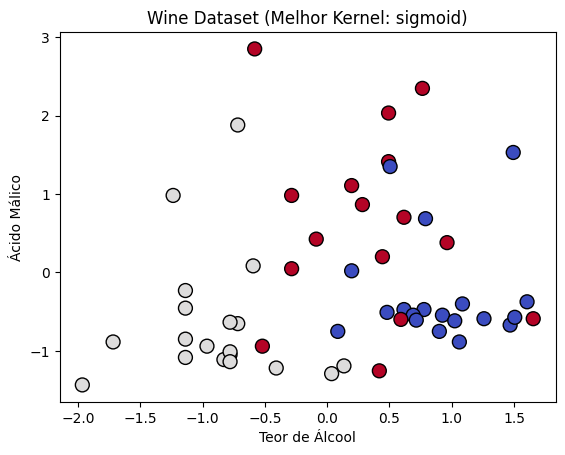

In [13]:
from sklearn.datasets import load_wine
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

X, y = load_wine(return_X_y=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['auto', 0.1, 1, 10],
    'C': [1, 5, 10]
}

grid_search = GridSearchCV(svm.SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

melhor_score = grid_search.best_score_
melhor_params = grid_search.best_params_

print(f"\nMelhor combinação de parâmetros: {melhor_params} -> Acurácia: {melhor_score * 100:.2f}%")

sv_best = grid_search.best_estimator_
sv_best.fit(X_train, y_train)

y_pred = sv_best.predict(X_test)

acuracia_geral = accuracy_score(y_test, y_pred)
print(f"\nAcurácia Geral do Modelo: {acuracia_geral * 100:.2f}%")

print("\nRelatório de Classificação do Melhor Modelo:")
report = classification_report(y_test, y_pred, output_dict=True)
print(classification_report(y_test, y_pred))

for classe in report.keys():
    if classe not in ['accuracy', 'macro avg', 'weighted avg']:
        precision = report[classe]['precision']
        recall = report[classe]['recall']
        f1 = report[classe]['f1-score']
        print(f"Classe {classe}: Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}")

plt.title(f"Wine Dataset (Melhor Kernel: {melhor_params['kernel']})")
plt.xlabel("Teor de Álcool")
plt.ylabel("Ácido Málico")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='coolwarm', edgecolors='k', s=100)
plt.show()


Justificativa:
A combinação de parâmetros {C: 1, gamma: 0.1, kernel: 'sigmoid'} se saiu muito bem, com uma alta acurácia e métricas de classe sólidas. A Classe 0 foi classificada perfeitamente, e as outras duas classes também apresentaram resultados robustos, embora com pequenas áreas para melhoria na Classe 2, especialmente em termos de precisão.
Esses resultados sugerem que esse modelo SVM é adequado para o conjunto de dados de vinho

Precision, Recall e F1-Score para cada classe: Esses valores ajudam a entender como o modelo está performando em relação a cada classe específica. Uma alta precision indica que a maioria das previsões positivas estão corretas. Um alto recall significa que o modelo consegue identificar a maioria das instâncias positivas.

Acurácia Geral: Essa métrica fornece uma visão geral de quão bem o modelo está se saindo em todas as classes.